In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = pd.read_csv("Live.csv")
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
model1 = KMeans(n_clusters=5,n_init='auto')
model1.fit(dataset)
#label = model.predict(dataset)

slht = silhouette_score(dataset,model1.labels_,metric='euclidean')
slht

0.8866768371183754

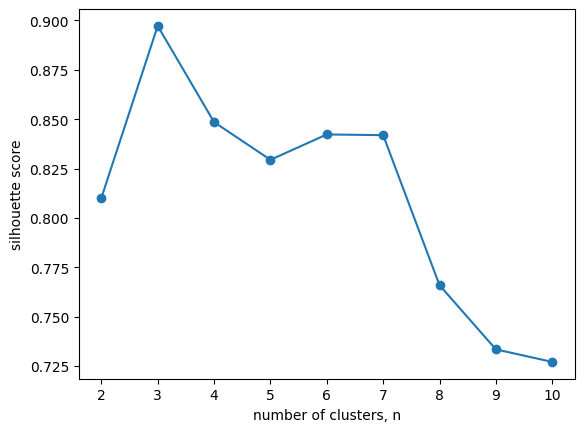

In [ ]:
silhtte = []
lst = list(range(2,11))
for i in lst:
  km=KMeans(n_clusters=i,n_init='auto')
  km.fit(dataset)

  silhtte.append(silhouette_score(dataset,km.labels_,metric='euclidean'))

plt.scatter(lst,silhtte)
plt.plot(lst,silhtte)
plt.xlabel("number of clusters, n")
plt.ylabel("silhouette score")
plt.show()

In [ ]:
#according to the silhouette scores n must be 4

model = KMeans(n_clusters=4,n_init='auto')
model.fit(dataset)
label = model.predict(dataset)

np.unique(label,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2334, 4288,  365,   63]))

In [ ]:
dataset["labels"] = label
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels,status
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1,1.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1,1.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1,1.0


In [ ]:
dataset.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.028743,-0.131515,0.105402,0.081046,-0.015843
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,-0.023340,-0.291846,-0.049413,0.330662,-0.288858
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.025708,-0.354780,-0.066524,0.404473,-0.354710
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.032658,-0.100537,0.114631,0.043784,0.018487
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.029523,-0.351741,-0.065283,0.401499,-0.353093
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.011968,-0.086409,-0.003129,0.093498,-0.079325
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.015951,-0.159237,-0.034656,0.184682,-0.164903
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,-0.014489,-0.078953,0.020866,0.074971,-0.056411
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.014789,-0.115695,-0.028465,0.136370,-0.123799
status_type_link,0.028743,-0.023340,-0.025708,0.032658,-0.029523,-0.011968,-0.015951,-0.014489,-0.014789,1.000000,-0.118315,-0.022188,-0.066802,0.362846


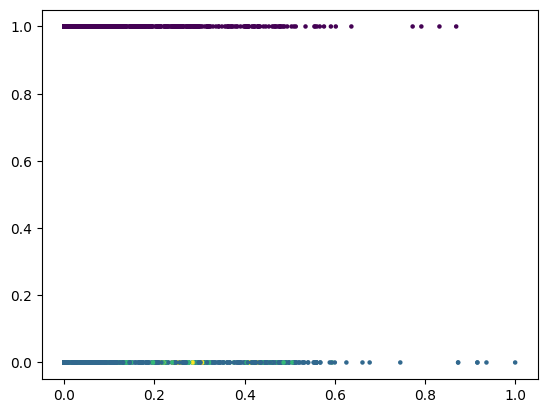

In [ ]:
plt.scatter(dataset["num_reactions"],dataset["status_type_video"],c=model.labels_,s=5)
plt.show()

In [ ]:
dataset[dataset["labels"]==0]["num_comments"]

0       0.024393
2       0.011243
6       0.029252
7       0.021582
15      0.004764
          ...   
6974    0.257456
6977    0.211148
6978    0.213054
6992    0.011434
7034    0.000000
Name: num_comments, Length: 2334, dtype: float64